In [2]:
from transformers import TFBertForSequenceClassification, BertTokenizer

# Load the model
model_path = 'D:\Mini Project\minipj\models\model_final'
model = TFBertForSequenceClassification.from_pretrained(model_path)

# Load the tokenizer
tokenizer_path = 'D:\Mini Project\minipj\models\\final_tokenizer'
tokenizer = BertTokenizer.from_pretrained(tokenizer_path)


<>:4: SyntaxWarning: invalid escape sequence '\M'
<>:8: SyntaxWarning: invalid escape sequence '\M'
<>:4: SyntaxWarning: invalid escape sequence '\M'
<>:8: SyntaxWarning: invalid escape sequence '\M'
C:\Users\rosha\AppData\Local\Temp\ipykernel_22168\927483291.py:4: SyntaxWarning: invalid escape sequence '\M'
  model_path = 'D:\Mini Project\minipj\models\model_final'
C:\Users\rosha\AppData\Local\Temp\ipykernel_22168\927483291.py:8: SyntaxWarning: invalid escape sequence '\M'
  tokenizer_path = 'D:\Mini Project\minipj\models\\final_tokenizer'


Some layers from the model checkpoint at D:\Mini Project\minipj\models\model_final were not used when initializing TFBertForSequenceClassification: ['dropout_75']
- This IS expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertForSequenceClassification were initialized from the model checkpoint at D:\Mini Project\minipj\models\model_final.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSequenceClassification for predictions without further training.


In [16]:
import tensorflow as tf
def classify_sentence(sentence):
    # Tokenize the sentence
    inputs = tokenizer(sentence, return_tensors="tf", padding=True, truncation=True, max_length=512)
    
    # Predict
    logits = model(inputs["input_ids"], attention_mask=inputs["attention_mask"])[0]
    
    # Convert logits to probabilities (optional)
    probabilities = tf.nn.softmax(logits, axis=1).numpy()
    
    # Get the predicted class (the one with the highest probability)
    predicted_class_id = tf.argmax(probabilities, axis=1).numpy()[0]
    
    return predicted_class_id, probabilities[0][predicted_class_id]

# Example usage
sentence = input()
predicted_class, probability = classify_sentence(sentence)
if predicted_class == 0:
    predicted_class = 'Not Suicidal'
else:
    predicted_class = 'Suicidal'
print("The prompt:", sentence)
print(f"Predicted class: {predicted_class}, Probability: {probability}")

The prompt: I want to jump off this building
Predicted class: Suicidal, Probability: 0.9866133332252502


In [5]:
from transformers import BertTokenizer, TFBertForSequenceClassification, InputExample, InputFeatures
import tensorflow as tf
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Load the dataset
train = pd.read_csv("D:\Mini Project\minipj\data\Suicide_Detection.csv")

# Preprocess the labels
train['class'] = train['class'].map({'suicide': 1, 'non-suicide': 0})
data = train['text'].tolist()
labels = train['class'].tolist()

# Split the dataset
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.10, random_state=0)
x_train, x_val, y_train, y_val= train_test_split(x_train, y_train, test_size=0.20, random_state=0)

test_encodings = tokenizer(x_test, truncation=True, padding=True, max_length=128, return_tensors="tf")

# Convert to TensorFlow dataset
test_dataset = tf.data.Dataset.from_tensor_slices((dict(test_encodings), y_test))
test_dataset = test_dataset.batch(32)  # Use the same batch size as used in training



<>:8: SyntaxWarning: invalid escape sequence '\M'
<>:8: SyntaxWarning: invalid escape sequence '\M'
C:\Users\rosha\AppData\Local\Temp\ipykernel_22168\751456314.py:8: SyntaxWarning: invalid escape sequence '\M'
  train = pd.read_csv("D:\Mini Project\minipj\data\Suicide_Detection.csv")


In [ ]:
from sklearn.metrics import accuracy_score
import numpy as np

# Make predictions
preds = model.predict(test_dataset)
predicted_labels = np.argmax(preds.logits, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_test, predicted_labels)


## Performance Metrics

In [15]:
print(f'Test Accuracy: {accuracy*100:.2f}%')

Test Accuracy: 96.99%


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc
import seaborn as sns


In [17]:
# Assuming 'y_test' is your true labels and 'predicted_labels' are the labels predicted by your model
print(classification_report(y_test, predicted_labels, target_names=['Non-Suicide', 'Suicide']))


              precision    recall  f1-score   support

 Non-Suicide       0.98      0.96      0.97     11585
     Suicide       0.96      0.98      0.97     11623

    accuracy                           0.97     23208
   macro avg       0.97      0.97      0.97     23208
weighted avg       0.97      0.97      0.97     23208



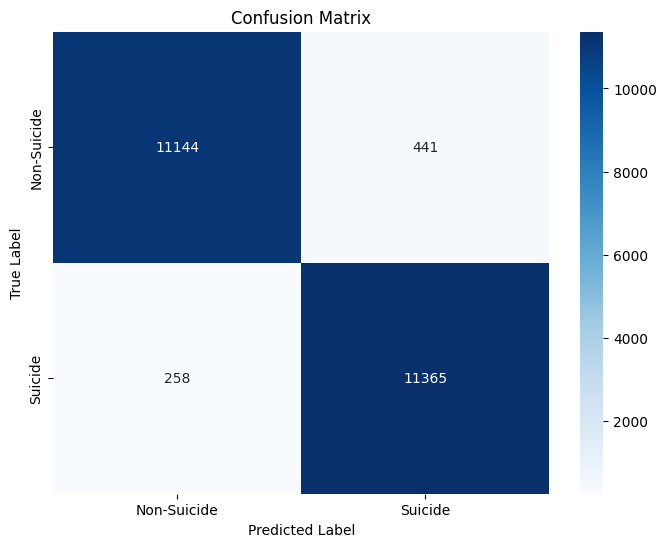

In [18]:
cm = confusion_matrix(y_test, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Suicide', 'Suicide'], yticklabels=['Non-Suicide', 'Suicide'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


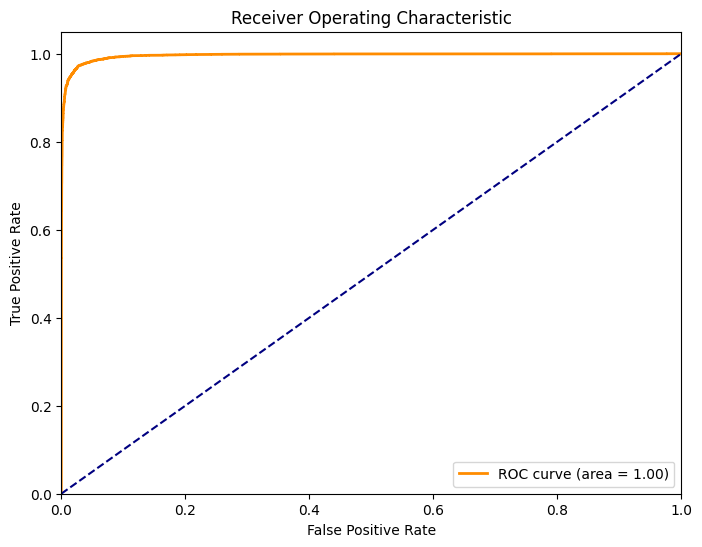

In [21]:
# Compute probabilities using softmax
probs = tf.nn.softmax(preds.logits, axis=1).numpy()[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, predicted_labels)
precision = precision_score(y_test, predicted_labels)
recall = recall_score(y_test, predicted_labels)
f1 = f1_score(y_test, predicted_labels)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


Accuracy: 0.9699
Precision: 0.9626
Recall: 0.9778
F1-Score: 0.9702
